#📌 Extracão

In [2]:
import pandas as pd

# Carregar o JSON bruto
df = pd.read_json("TelecomX_Data.json")

print("✅ Dados carregados com sucesso!", df.shape)
df.head()


✅ Dados carregados com sucesso! (7267, 6)


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [3]:
import unicodedata

# Expandir os dicionários internos
df_exp = pd.json_normalize(df.to_dict(orient="records"))

# Função para normalizar nomes
def normalizar_nome(col):
    col = "".join(c for c in unicodedata.normalize("NFKD", col) if not unicodedata.combining(c))
    col = col.strip().lower()
    for ch in [" ", "-", "/", "\\", ".", ",", "(", ")", "%", "º", "ª", ":"]:
        col = col.replace(ch, "_")
    col = "_".join([c for c in col.split("_") if c])
    return col

# Aplicar padronização
df_exp.columns = [normalizar_nome(c) for c in df_exp.columns]

# Remover duplicados
df_exp = df_exp.drop_duplicates().reset_index(drop=True)

# Converter numéricos importantes
for col in ["account_charges_monthly", "account_charges_total", "customer_tenure"]:
    if col in df_exp.columns:
        df_exp[col] = pd.to_numeric(df_exp[col], errors="coerce")

# Criar coluna contas_diarias
if "account_charges_monthly" in df_exp.columns:
    df_exp["contas_diarias"] = df_exp["account_charges_monthly"] / 30

print("✅ Transformação concluída! Linhas x Colunas:", df_exp.shape)
df_exp.head()


✅ Transformação concluída! Linhas x Colunas: (7267, 22)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#📊 Carga e análise

📊 Estatísticas descritivas:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerid,7267,7267,9995-HOTOH,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
churn,7267,3,No,5174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_gender,7267,2,Male,3675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_seniorcitizen,7267.0,NaN,NaN,NaN,0.162653,0.369074,0.0,0.0,0.0,0.0,1.0
customer_partner,7267,2,No,3749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_dependents,7267,2,No,5086,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_tenure,7267.0,NaN,NaN,NaN,32.346498,24.571773,0.0,9.0,29.0,55.0,72.0
phone_phoneservice,7267,2,Yes,6560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
phone_multiplelines,7267,3,No,3495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
internet_internetservice,7267,3,Fiber optic,3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


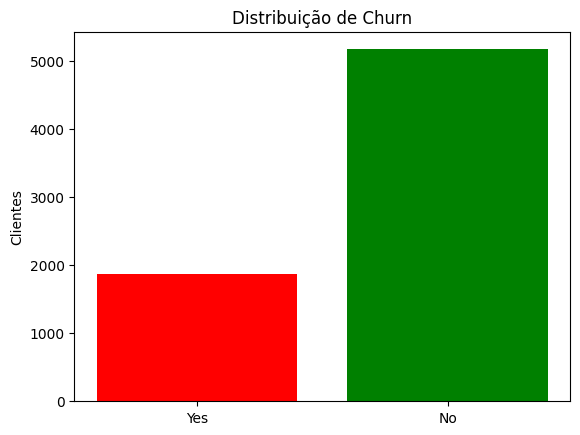

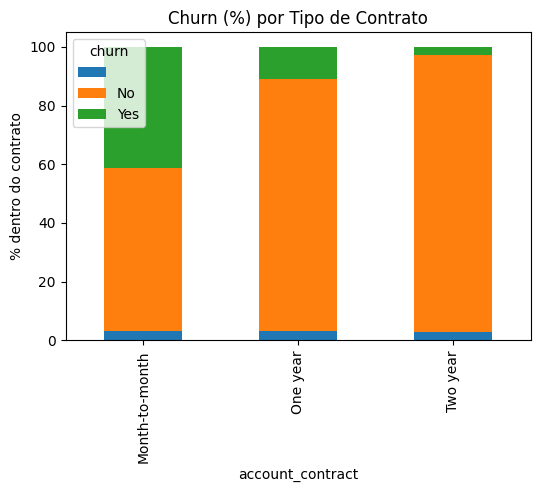

/tmp/ipython-input-2512482447.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grupos, labels=["Churn","Não churn"], showmeans=True)


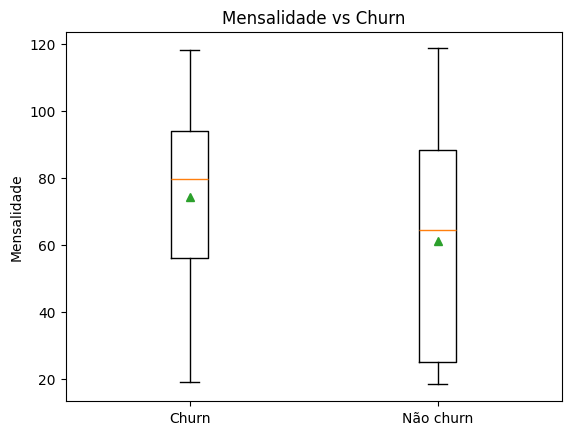

In [4]:
import matplotlib.pyplot as plt

print("📊 Estatísticas descritivas:")
display(df_exp.describe(include="all").T)

# Distribuição de Churn
if "churn" in df_exp.columns:
    churn_counts = df_exp["churn"].value_counts().reindex(["Yes","No"]).fillna(0)
    plt.bar(churn_counts.index, churn_counts.values, color=["red","green"])
    plt.title("Distribuição de Churn")
    plt.ylabel("Clientes")
    plt.show()

# Churn por tipo de contrato
if "account_contract" in df_exp.columns:
    churn_contract = pd.crosstab(df_exp["account_contract"], df_exp["churn"], normalize="index")*100
    churn_contract.plot(kind="bar", stacked=True, figsize=(6,4))
    plt.title("Churn (%) por Tipo de Contrato")
    plt.ylabel("% dentro do contrato")
    plt.show()

# Mensalidade vs Churn
if "account_charges_monthly" in df_exp.columns:
    grupos = [df_exp.loc[df_exp["churn"]=="Yes","account_charges_monthly"].dropna(),
              df_exp.loc[df_exp["churn"]=="No","account_charges_monthly"].dropna()]
    plt.boxplot(grupos, labels=["Churn","Não churn"], showmeans=True)
    plt.title("Mensalidade vs Churn")
    plt.ylabel("Mensalidade")
    plt.show()


#📄Relatorio Final

<div align="justify">

# : Relatório Final – Análise de Churn (Telecom X)

O objetivo dessa primeira etapa foi organizar os dados da Telecom X e identificar os principais fatores relacionados ao cancelamento de clientes (**churn**).  

Após o tratamento do JSON e expansão das colunas, algumas informações se destacaram:  

- **Contratos mensais** concentraram a maior parte dos cancelamentos, enquanto contratos de longo prazo apresentaram taxas bem menores.  
- Clientes **recentes** (tenure baixo) mostraram maior risco de churn, indicando que os primeiros meses são decisivos para a retenção.  
- **Mensalidades mais altas** também apareceram ligadas a um número maior de cancelamentos.  
- Métodos de pagamento mais automáticos, como débito em conta, parecem contribuir para reduzir evasões.  

**Conclusão:** O churn está mais associado a clientes novos, com contratos curtos e planos caros. Estratégias possíveis seriam incentivar contratos de maior duração, oferecer descontos para novos clientes e investir em um acompanhamento mais próximo nos primeiros meses.  

</div>
